In [1]:
import os
import json
import glob
import collections
import random


from stable_baselines3.common import results_plotter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


plt.rc('pdf',fonttype = 42)
plt.rc('ps',fonttype = 42)

2024-06-23 13:08:52.819117: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-23 13:08:53.371065: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-23 13:08:54.253727: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 13:08:54.253838: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 13:08:54.253939: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
SMALL_SIZE = 25
MEDIUM_SIZE = 30
BIGGER_SIZE = 40
LINEWIDTH = 5


OURS = "Deconfounded"
NAIVEBC = "Naive BC"
ORACLE = "Oracle"
DAGGER = "DAgger"
TRUE_INTERVENTIONAL = "True interventional"
TRUE_CONDITIONAL = "True conditional"
EXPERT = 'Expert'
GAIL = "GAIL"

# From https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=5
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
r = lambda: random.randint(0,255)
L2C = collections.defaultdict(lambda : f"#{r():02x}{r():02x}{r():02x}")


L2C.update({
    OURS: '#e41a1c',
#     NAIVEBC: '#377eb8',
    NAIVEBC: "#75c1ff",
    ORACLE: 'black',
    DAGGER: 'grey',
    TRUE_INTERVENTIONAL: 'black',
    TRUE_CONDITIONAL: 'black',
    EXPERT: 'black',
    GAIL: 'orange',
})
styles = ["-", "--", "-.", ":", "-"]
rs = lambda: random.randint(0,len(styles)-1)
L2LS = collections.defaultdict(lambda: styles[rs()])
L2LS.update({
    OURS: "solid",
    NAIVEBC: "solid",
    ORACLE: 'solid',
    DAGGER: 'dashed',
    TRUE_INTERVENTIONAL: 'dashed',
    TRUE_CONDITIONAL: 'dashdot',
    EXPERT: 'solid',
    GAIL: 'dashdot',
})


plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=LINEWIDTH)

In [4]:
expdirs = [
    "/data/cetus/risrio/dil/logs/20230724_dil_bandit_enc_train_steps_1_mse_loss",
    "/data/cetus/risrio/dil/logs/20230807_bc_bandit/",
]


In [5]:
train_dfs = []
eval_dfs = []
rl_dfs = []
for ed in expdirs:
    logdirs = glob.glob(os.path.join(ed, "**", "args.json"), recursive=True)
    for ld in logdirs:
        with open(ld, "r") as f:
            args = json.load(f)
        label = ""
        if args.get("deconfounding"):
            label = OURS
        elif args.get("dagger"):
            label = DAGGER
        elif "permutation" in args["imitator_feature_extractor_obs_keys"]:
            label = ORACLE
        else:
            label = NAIVEBC

        dirname = os.path.dirname(ld)
        try:
            train_df = pd.read_csv(os.path.join(dirname, "train", "progress.csv"))
            for k, v in args.items():
                train_df[k] = str(v)
            train_df["label"] = label
            train_dfs.append(train_df)
        except:
            print(f"couldn't load train {dirname}")
        try:
            eval_df = pd.read_csv(os.path.join(dirname, "eval", "progress.csv"))
            eval_df["label"] = label
            for k, v in args.items():
                eval_df[k] = str(v)
            eval_dfs.append(eval_df)
        except:
            print(f"couldn't load {dirname}")
        try:
            rl_df = pd.read_csv(os.path.join(dirname, "rlalgo", "progress.csv"))
            rl_df["label"] = label
            for k, v in args.items():
                rl_df[k] = str(v)
            rl_dfs.append(rl_df)
        except:
            print(f"couldn't load {dirname}")

try:
    train_df = pd.concat(train_dfs)
except:
    print("no train")
try:
    eval_df = pd.concat(eval_dfs)
except:
    print("no eval")
try:
    rl_df = pd.concat(rl_dfs)
except:
    print("no rl")


couldn't load /data/cetus/risrio/dil/logs/20230724_dil_bandit_enc_train_steps_1_mse_loss/trainable_2023-07-24_09-43-02/trainable_7db17_00008_8_kl_weight=0.0100,seed=629338_2023-07-24_09-43-06
couldn't load /data/cetus/risrio/dil/logs/20230724_dil_bandit_enc_train_steps_1_mse_loss/trainable_2023-07-24_09-43-02/trainable_7db17_00005_5_kl_weight=0.0100,seed=34567_2023-07-24_09-43-06
couldn't load /data/cetus/risrio/dil/logs/20230724_dil_bandit_enc_train_steps_1_mse_loss/trainable_2023-07-24_09-43-02/trainable_7db17_00006_6_kl_weight=0.0100,seed=5678765_2023-07-24_09-43-06
couldn't load /data/cetus/risrio/dil/logs/20230724_dil_bandit_enc_train_steps_1_mse_loss/trainable_2023-07-24_09-43-02/trainable_7db17_00000_0_kl_weight=0.0100,seed=2342348_2023-07-24_09-43-06
couldn't load /data/cetus/risrio/dil/logs/20230724_dil_bandit_enc_train_steps_1_mse_loss/trainable_2023-07-24_09-43-02/trainable_7db17_00009_9_kl_weight=0.0100,seed=8565959_2023-07-24_09-43-06
couldn't load /data/cetus/risrio/dil/l

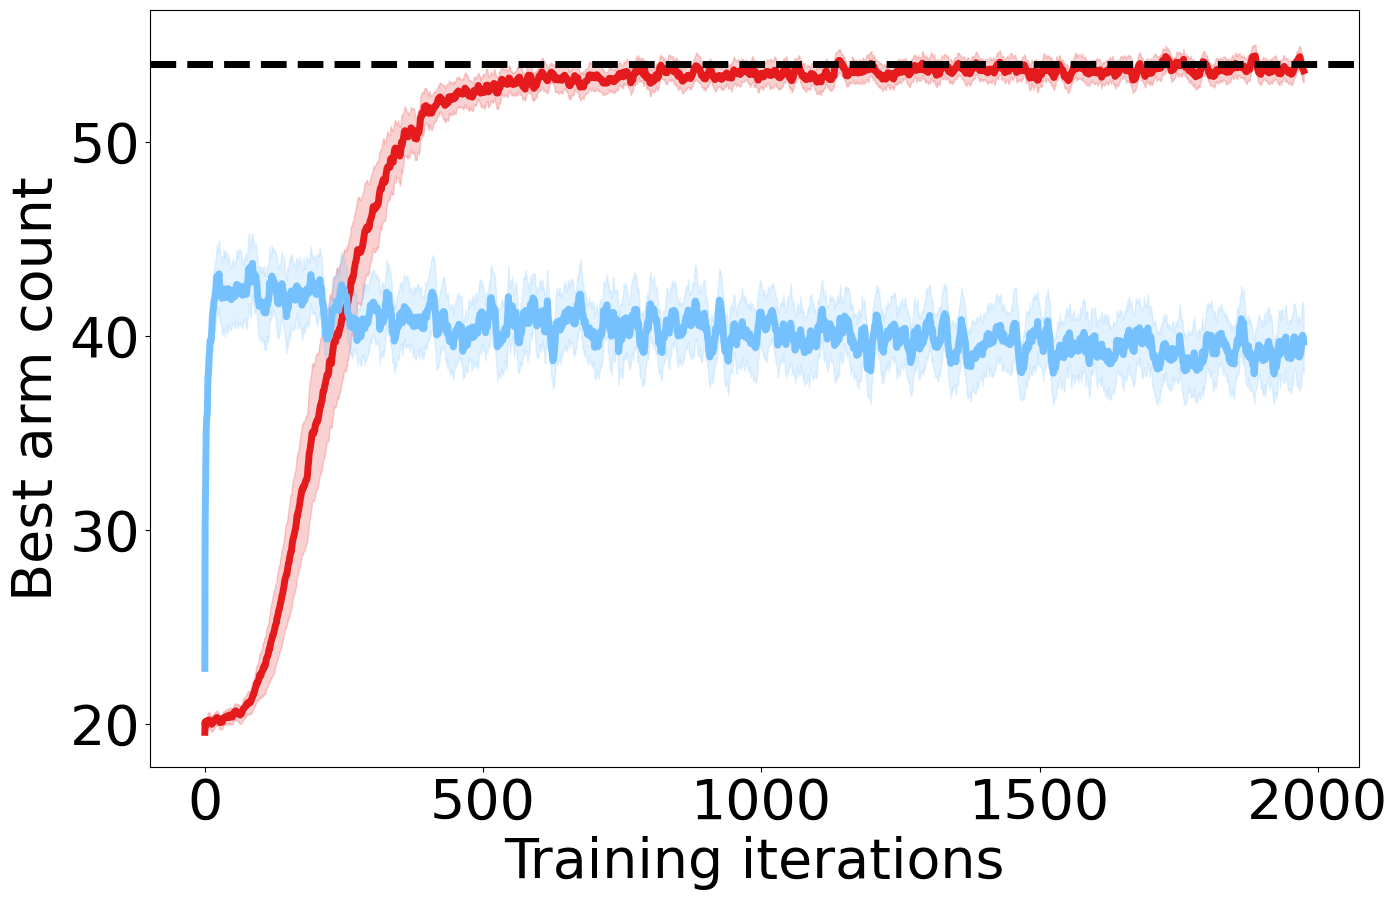

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10,))
col = 'bc/rewards'
x = 'train/step'
window = 10

legend_items, legend_labels = [], []


data = eval_df

for label in sorted(data.label.unique()):
    df = data[data.label == label]
    df = df[df[col].isna() == False]
    df[x] = df.index
    mean = df[df.label == label][[col, x, 'seed']].groupby(['seed']).rolling(window, min_periods=1).mean().groupby([x]).mean().reset_index()
    n_seeds = len(df.seed.unique())
    st_mean = df[df.label == label][[col, x, 'seed']].groupby(['seed']).rolling(window, min_periods=1).mean().groupby([x]).mean().reset_index()
    st_err  = df[df.label == label][[col, x, 'seed']].groupby([x]).std().rolling(window).mean().reset_index() / np.sqrt(n_seeds)
    line = ax.plot(mean[x].tolist(), mean[col], label=label, color=L2C[label], linestyle=L2LS[label])
    low = st_mean[col] - st_err[col]
    high = st_mean[col] + st_err[col]
    ax.fill_between(st_mean[x].tolist(), low, high, alpha=0.2, color=L2C[label])
    proxy = ax.fill(np.NaN, np.NaN, c=L2C[label], alpha=0.2, linewidth=0.0)
    legend_items.append((line[0], proxy[0]))
    legend_labels.append(label)


ax.set_xlabel("Training iterations")
ax.set_ylabel("Best arm count")
line = plt.axhline(y=54,  label=TRUE_INTERVENTIONAL, color=L2C[TRUE_INTERVENTIONAL], linestyle=L2LS[TRUE_INTERVENTIONAL])
legend_items.append(line)
legend_labels.append(TRUE_INTERVENTIONAL)
plt.tight_layout()
plt.savefig('bandit_imitation_best_arm_count_no_legend.pdf', format='pdf')

In [10]:
import re
import pickle
import tree

def pack_structure(xs, axis=0):
    return tree.map_structure(lambda *xs: np.stack(xs, axis=axis), *xs)

def softmax(logits, axis=-1):
    return np.exp(logits) / np.sum(np.exp(logits), axis=axis, keepdims=True)

def load_for_expdir(expdir, traj_pattern="trajs_*", traj_index=-1):
    all_data = []
    logdirs = glob.glob(os.path.join(expdir, "**", "args.json"), recursive=True)
    for ld in logdirs:
        dirname = os.path.dirname(ld)
        trajs = glob.glob(os.path.join(dirname, traj_pattern))
        trajs = sorted(trajs, key=lambda x: int(re.search("([0-9]*).pkl", x).group(1)))
        try:
            with open(trajs[traj_index], 'rb') as f:
                data = pickle.load(f)
            all_data.append(data)
        except:
            print("Failed to load", dirname)
    return pack_structure(all_data, axis=1)


In [11]:
import pandas as pd
test_df = pd.read_csv("../ortega_trajs_test.csv")
expert_df = pd.read_csv("../ortega_trajs_expert.csv")
test_df.head()

,Unnamed: 0,ours_mean,ours_sterr,bc_mean,bc_sterr,interventional,conditional
0,0,0.199561,0.001031,0.200136,0.000135,0.20155,0.20310
1,1,0.211072,0.001044,0.222780,0.001062,0.21710,0.22730
2,2,0.227691,0.002007,0.242315,0.001914,0.23385,0.24375
3,3,0.246971,0.002651,0.256063,0.002254,0.25500,0.25820
4,4,0.269988,0.003048,0.268722,0.002168,0.27815,0.27090


In [12]:
ARMS = [0, 1, 2, 3, 4]
TRUE_THETA = 0
EPISODE_LENGTH = 100
NUM_ITERATIONS = 10000


def update(logtheta, a, obs):
    logtheta = logtheta.copy()
    l1 = np.log(0.75) * obs + np.log(0.25) * (1-obs)
    l2 = np.log(0.25) * obs + np.log(0.75) * (1-obs)
    for arm in ARMS:
        if arm == a:
            logtheta[arm] = logtheta[arm] + l1
        else:
            logtheta[arm] = logtheta[arm] + l2
    return logtheta


def confounded_update(logtheta, a, obs):
    logtheta = logtheta.copy()
    l1 = np.log(0.75) * obs + np.log(0.25) * (1-obs)
    l2 = np.log(0.25) * obs + np.log(0.75) * (1-obs)
    for arm in ARMS:
        if arm == a:
            logtheta[arm] = logtheta[arm] + l1 + np.log(0.6)
        else:
            logtheta[arm] = logtheta[arm] + l2 + np.log(0.1)
    return logtheta


def bandit(action):
    if action == TRUE_THETA:
        return np.random.binomial(1, 0.75)
    else:
        return np.random.binomial(1, 0.25)

    
def softmax(logits, axis=-1):
    return np.exp(logits) / np.sum(np.exp(logits), axis=axis, keepdims=True)


def sample_from_categorical(probs):
    p = np.cumsum(probs, axis=-1)
    desired_r_shape = tuple(s for s in probs.shape[:-1]) + (1,)
    r = np.random.uniform(0, 1, probs[..., 0].size).reshape((desired_r_shape))
    return np.argmax(p > r, axis=-1)

In [13]:

tps = []
parms = []
actions = []
for i in tqdm(range(NUM_ITERATIONS)):
    logtheta = np.log(np.ones(5) * 0.2)
    logthetas = [logtheta]
    thetaprobs = [softmax(logtheta)]
    p_best_arm = []
    for i in range(EPISODE_LENGTH):
        belief = sample_from_categorical(softmax(logtheta))
        thetaprobs.append(softmax(logtheta))
        action_probs = np.ones(5) * 0.1
        action_probs[belief] = 0.6
        action = sample_from_categorical(action_probs)
        actions.append(action)
        obs = bandit(action)
        logtheta = update(logtheta, action, obs)
        logthetas.append(logtheta)
        p_best_arm.append(action_probs[TRUE_THETA])

    parm = np.stack(p_best_arm)
    parms.append(parm)
    tps.append(thetaprobs)


  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:49<00:00, 200.21it/s]


In [14]:
interventional_policy_probs = np.stack(parms, axis=1)

In [15]:
conf_parms = []
conf_actions = []
conf_expert_losses = []

for i in tqdm(range(NUM_ITERATIONS)):
    logtheta = np.log(np.ones(5) * 0.2)
    logthetas = [logtheta]
    p_best_arm = []
    for i in range(EPISODE_LENGTH):
        belief = sample_from_categorical(softmax(logtheta))
        action_probs = np.ones(5) * 0.1
        action_probs[belief] = 0.6
        action = sample_from_categorical(action_probs)
        conf_actions.append(action)
        obs = bandit(action)
        logtheta = confounded_update(logtheta, action, obs)
        logthetas.append(logtheta)
        p_best_arm.append(action_probs[TRUE_THETA])
    conf_parm = np.stack(p_best_arm)
    conf_parms.append(conf_parm)


100%|██████████| 10000/10000 [00:46<00:00, 214.65it/s]


In [16]:
confounded_policy_probs = np.stack(conf_parms, axis=1)

In [17]:
bc_expdir = "/data/cetus/risrio/dil/logs/20230807_bc_bandit/"
dil_expdir = "/data/cetus/risrio/dil/logs/20230724_dil_bandit_enc_train_steps_1_mse_loss"

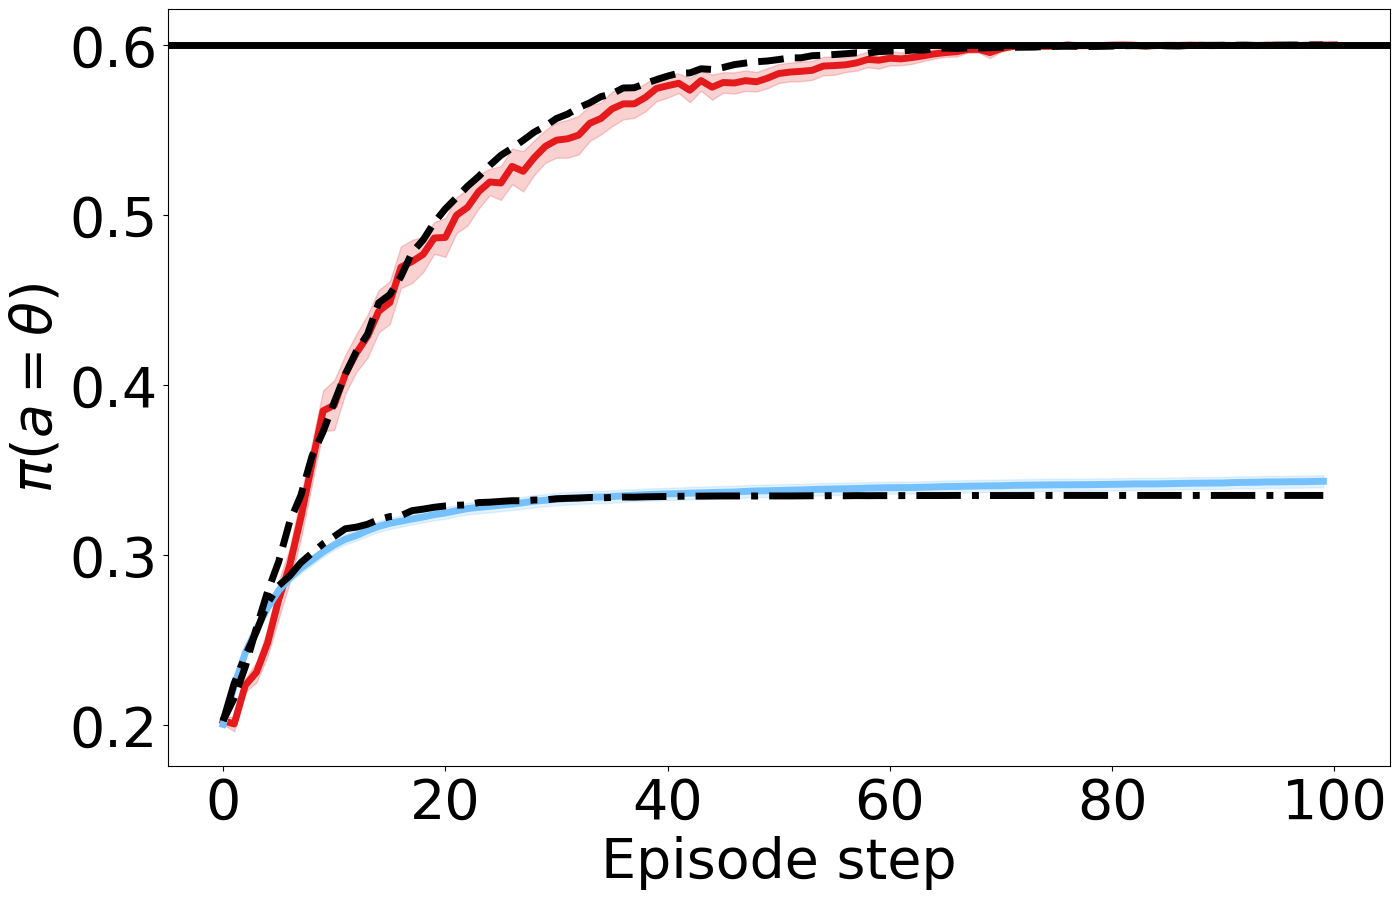

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

legend_items, legend_labels = [], []

trajs = load_for_expdir(dil_expdir, traj_index=-1)
latent = np.eye(5)[trajs['obs']["best_arm"]]
logits = trajs['logits']
i_probs = np.sum(softmax(logits) * latent, axis=-1)
T, S, B = i_probs.shape
means = i_probs.reshape(T, S, B).mean(axis=2)
mean = means.mean(axis=1)
line = ax.plot(mean, label=OURS, linewidth=LINEWIDTH, color=L2C[OURS], linestyle=L2LS[OURS])
std = means.std(axis=-1)
sterr = std /  np.sqrt(S)
low = mean - sterr
high = mean + sterr
ax.fill_between(np.arange(len(mean)), low, high, alpha=0.2, color=L2C[OURS])
proxy = ax.fill(np.NaN, np.NaN, color=L2C[OURS], alpha=0.2, linewidth=0.0)
legend_items.append((line[0], proxy[0]))
legend_labels.append(OURS)


mean = test_df["bc_mean"]
line = ax.plot(mean, label=NAIVEBC, linewidth=LINEWIDTH, color=L2C[NAIVEBC], linestyle=L2LS[NAIVEBC])
sterr = test_df["bc_sterr"]
low = mean - sterr
high = mean + sterr
ax.fill_between(np.arange(len(mean)), low, high, alpha=0.2, color=L2C[NAIVEBC])
proxy = ax.fill(np.NaN, np.NaN, color=L2C[NAIVEBC], alpha=0.2, linewidth=0.0)
legend_items.append((line[0], proxy[0]))
legend_labels.append(NAIVEBC)


line = ax.axhline(y=0.6, color=L2C[EXPERT], linestyle='-', label=EXPERT, linewidth=LINEWIDTH)
legend_items.append(line)
legend_labels.append(EXPERT)

mean = interventional_policy_probs.mean(axis=-1)[:EPISODE_LENGTH]
line = ax.plot(mean, label=TRUE_INTERVENTIONAL, linewidth=LINEWIDTH, color=L2C[TRUE_INTERVENTIONAL], linestyle=L2LS[TRUE_INTERVENTIONAL])
legend_items.append(line[0])
legend_labels.append(TRUE_INTERVENTIONAL)

mean = confounded_policy_probs.mean(axis=-1)[:EPISODE_LENGTH]
line = ax.plot(mean, label=TRUE_CONDITIONAL, linewidth=LINEWIDTH, color=L2C[TRUE_CONDITIONAL], linestyle=L2LS[TRUE_CONDITIONAL])
legend_items.append(line[0])
legend_labels.append(TRUE_CONDITIONAL)


ax.set_ylabel(r"$\pi(a = \theta )$")
ax.set_xlabel("Episode step")
plt.tight_layout()
plt.savefig('bandit_test_time_arm_probability_no_legend.pdf', format='pdf')


# For expert trajs

In [19]:
parms = []
actions = []
ap = np.array([0.6, 0.1, 0.1, 0.1, 0.1])
for i in tqdm(range(NUM_ITERATIONS)):
    logtheta = np.log(np.ones(5) * 0.2)
    logthetas = [logtheta]
    p_best_arm = []
    for i in range(EPISODE_LENGTH):
        belief = sample_from_categorical(softmax(logtheta))
        action_probs = np.ones(5) * 0.1
        action_probs[belief] = 0.6
        action = sample_from_categorical(ap)
        actions.append(action)
        obs = bandit(action)
        logtheta = update(logtheta, action, obs)
        logthetas.append(logtheta)
        p_best_arm.append(action_probs[TRUE_THETA])

    parm = np.stack(p_best_arm)
    parms.append(parm)

interventional_expert_traj_policy_probs = np.stack(parms, axis=1)
conf_parms = []
conf_actions = []
conf_expert_losses = []
ap = np.array([0.6, 0.1, 0.1, 0.1, 0.1])
for i in tqdm(range(NUM_ITERATIONS)):
    logtheta = np.log(np.ones(5) * 0.2)
    logthetas = [logtheta]
    p_best_arm = []
    for i in range(EPISODE_LENGTH):
        belief = sample_from_categorical(softmax(logtheta))
        action_probs = np.ones(5) * 0.1
        action_probs[belief] = 0.6
        action = sample_from_categorical(ap)
        conf_actions.append(action)
        obs = bandit(action)
        logtheta = confounded_update(logtheta, action, obs)
        logthetas.append(logtheta)
        p_best_arm.append(action_probs[TRUE_THETA])

            

    conf_parm = np.stack(p_best_arm)
    conf_parms.append(conf_parm)

confounded_expert_traj_policy_probs = np.stack(conf_parms, axis=1)

100%|██████████| 10000/10000 [00:46<00:00, 214.95it/s]


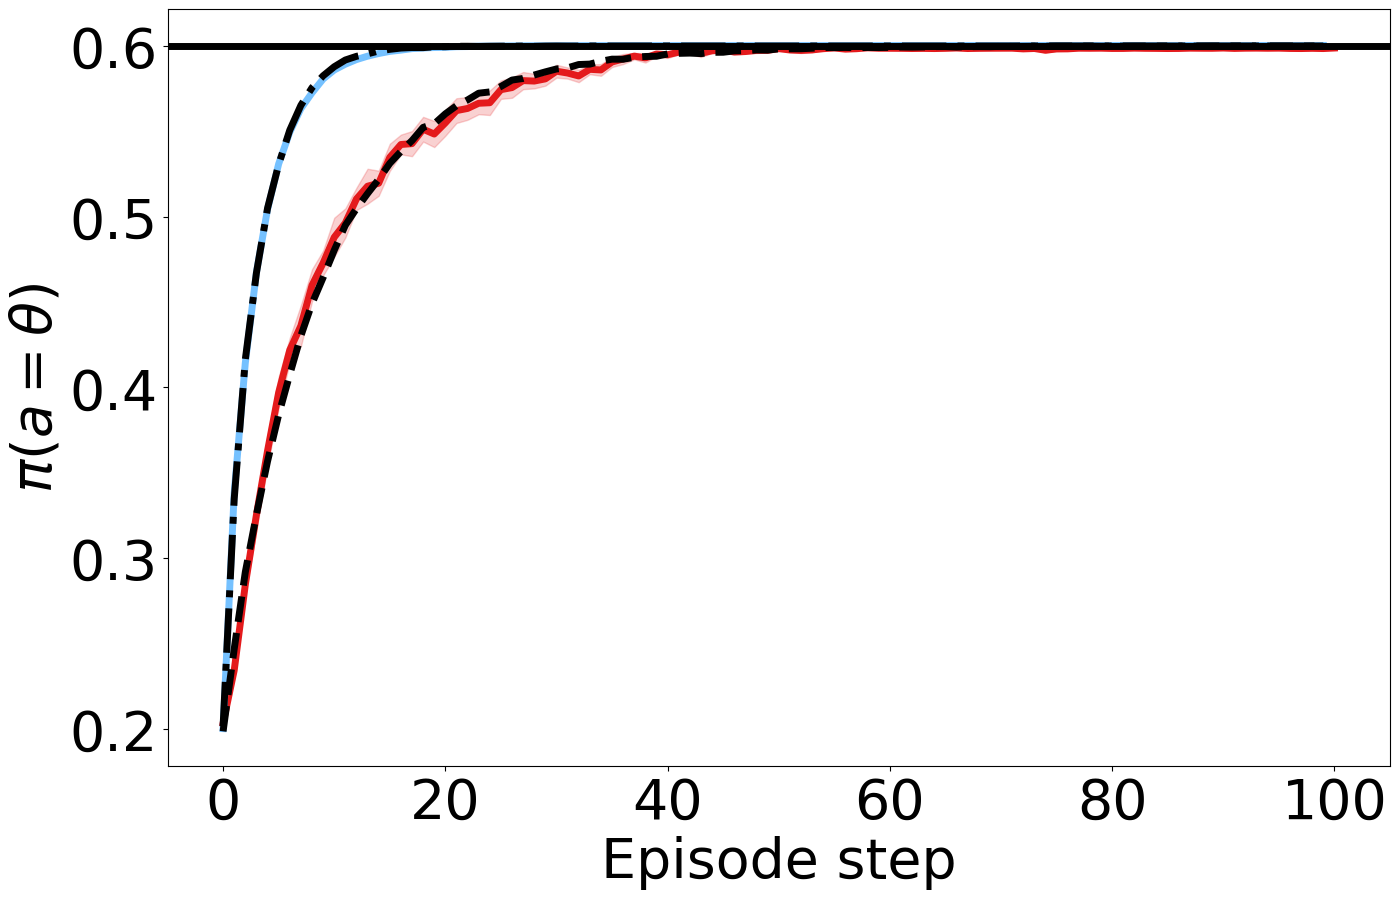

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

legend_items, legend_labels = [], []

trajs = load_for_expdir(dil_expdir, traj_pattern="expert_trajs_*.pkl")
latent = np.eye(5)[trajs['obs']["best_arm"]]
logits = trajs['logits']
i_probs = np.sum(softmax(logits) * latent, axis=-1)
T, S, B = i_probs.shape
means = i_probs.reshape(T, S, B).mean(axis=2)
mean = means.mean(axis=1)
line = ax.plot(mean, label=OURS, linewidth=LINEWIDTH, color=L2C[OURS], linestyle=L2LS[OURS])
std = means.std(axis=-1)
sterr = std /  np.sqrt(S)
low = mean - sterr
high = mean + sterr
ax.fill_between(np.arange(len(mean)), low, high, alpha=0.2, color=L2C[OURS])
proxy = ax.fill(np.NaN, np.NaN, color=L2C[OURS], alpha=0.2, linewidth=0.0)
legend_items.append((line[0], proxy[0]))
legend_labels.append(OURS)

mean = expert_df["bc_mean"]
line = ax.plot(mean, label=NAIVEBC, linewidth=LINEWIDTH, color=L2C[NAIVEBC], linestyle=L2LS[NAIVEBC])
sterr = expert_df["bc_sterr"]
low = mean - sterr
high = mean + sterr
ax.fill_between(np.arange(len(mean)), low, high, alpha=0.2, color=L2C[NAIVEBC])
proxy = ax.fill(np.NaN, np.NaN, color=L2C[NAIVEBC], alpha=0.2, linewidth=0.0)
legend_items.append((line[0], proxy[0]))
legend_labels.append(NAIVEBC)

line = ax.axhline(y=0.6, color=L2C[EXPERT], linestyle='-', label=EXPERT, linewidth=LINEWIDTH)
legend_items.append(line)
legend_labels.append(EXPERT)

mean = interventional_expert_traj_policy_probs.mean(axis=-1)[:EPISODE_LENGTH]
line = ax.plot(mean, label=TRUE_INTERVENTIONAL, linewidth=LINEWIDTH, color=L2C[TRUE_INTERVENTIONAL], linestyle=L2LS[TRUE_INTERVENTIONAL])
legend_items.append(line[0])
legend_labels.append(TRUE_INTERVENTIONAL)

mean = confounded_expert_traj_policy_probs.mean(axis=-1)[:EPISODE_LENGTH]
line = ax.plot(mean, label=TRUE_CONDITIONAL, linewidth=LINEWIDTH, color=L2C[TRUE_CONDITIONAL], linestyle=L2LS[TRUE_CONDITIONAL])
legend_items.append(line[0])
legend_labels.append(TRUE_CONDITIONAL)


ax.set_ylabel(r"$\pi(a = \theta )$")
ax.set_xlabel("Episode step")

plt.tight_layout()
plt.savefig('bandit_test_time_arm_probability_expert_trajs_no_legend.pdf', format='pdf')


In [32]:
l_dict = {k: v for k, v in zip(legend_labels, legend_items)}

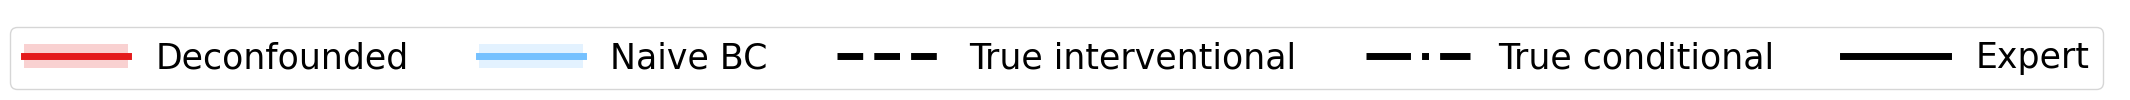

In [47]:
labels_ordered = ["Deconfounded", 'Naive BC', 'True interventional', 'True conditional', 'Expert']
items_ordered = [l_dict[l] for l in labels_ordered]

fig, ax = plt.subplots(1, 1, figsize=(22, 2))
_ = ax.legend(items_ordered, labels_ordered, handlelength=3, ncol=5, fontsize=MEDIUM_SIZE-5)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('bandit_separate_legend_1_row.pdf', format='pdf')
